**LGM VIP INTERNSHIP** **Stock Market Prediction And Forecasting Using Stacked LSTM** **BEGINNER LEVEL TASK 2**

**VARSHA GIRIDHARAN**

**Step 1: Import packages**

In [ ]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

**Step 2: Load data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL (1).csv


**Step 3: Import data**

In [ ]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df_close = df['Close']

In [ ]:
df_close.shape

(2035,)

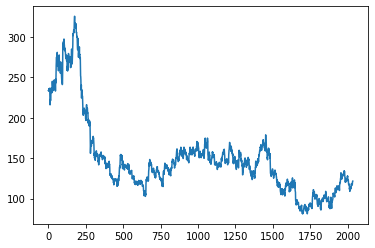

In [ ]:
plt.plot(df_close)

 We apply MinMax Scaler to transform our values between 0 and 1 because LSTM are sensitive to the scale of the data

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(2035, 1)

In [ ]:
df_close

array([[1.45802651],
       [1.455081  ],
       [1.46097202],
       ...,
       [1.1621732 ],
       [1.16319444],
       [1.16584967]])

**Step 4: Split data**

In [ ]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Step 5: Create LTSM model**

In [ ]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 23s 641ms/step - loss: 0.4863 - val_loss: 0.0013
Epoch 2/100
23/23 [==============================] - 9s 376ms/step - loss: 0.0441 - val_loss: 0.0207
Epoch 3/100
23/23 [==============================] - 8s 354ms/step - loss: 0.0358 - val_loss: 0.0248
Epoch 4/100
23/23 [==============================] - 8s 358ms/step - loss: 0.0302 - val_loss: 0.0366
Epoch 5/100
23/23 [==============================] - 8s 362ms/step - loss: 0.0266 - val_loss: 0.0206
Epoch 6/100
23/23 [==============================] - 8s 359ms/step - loss: 0.0235 - val_loss: 0.0120
Epoch 7/100
23/23 [==============================] - 8s 356ms/step - loss: 0.0214 - val_loss: 0.0105
Epoch 8/100
23/23 [==============================] - 8s 357ms/step - loss: 0.0201 - val_loss: 0.0064
Epoch 9/100
23/23 [==============================] - 8s 358ms/step - loss: 0.0191 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 8s 369ms/step - loss: 0.0188 - val_l

In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

1.035318168125933

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1.0083753555640844

**Step 6: Plot data**

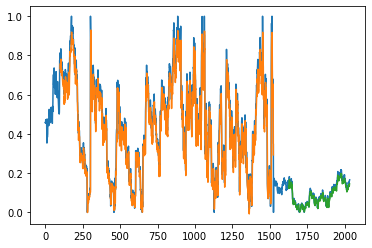

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Predict the next 30 days Stock Price**

In [ ]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [ ]:
x_input = test_data[208:].reshape(1,-1)
x_input.shape

(1, 301)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

**Step 7: Output**

In [ ]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>301):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.1514616]
302
1 day input [1.02246732 1.03125    1.02348856 1.0249183  1.02144608 1.04840686
 1.04575163 1.03962418 1.03921569 1.04758987 1.04513889 1.04166667
 1.04125817 1.05044935 1.05555556 1.05494281 1.05412582 1.0435049
 1.04799837 1.05147059 1.05065359 1.03431373 1.04575163 1.04187092
 1.04554739 1.03941993 1.02716503 1.03125    1.05882353 1.07148693
 1.08721405 1.08986928 1.10498366 1.08905229 1.10355392 1.10375817
 1.12275327 1.10906863 1.09660948 1.1064134  1.10457516 1.11049837
 1.1127451  1.09803922 1.09987745 1.08925654 1.0747549  1.08169935
 1.08925654 1.09068627 1.08129085 1.08823529 1.08455882 1.07945261
 1.08374183 1.07781863 1.09824346 1.09089052 1.09007353 1.09558824
 1.06862745 1.06372549 1.0494281  1.04799837 1.04534314 1.0443219
 1.03941993 1.0379902  1.04656863 1.05085784 1.07209967 1.06535948
 1.07230392 1.07802288 1.07741013 1.06086601 1.06413399 1.07046569
 1.05412582 1.0498366  1.05167484 1.05330882 1.0435049  1.02634804
 1.02410131 1.02961601 1.01960784 1.

**Summary:** In this project, we learned to train our own supervised machine learning model using Stock Market Prediction Project with Machine Learning. Through this project, we learned about machine learning, data analysis, data visualization, model creation, model prediction, etc.